# Solar Sail Simulation

Simulation of solar sail trajectories under Prof. Pister at the University of California: Berkeley for the Berkeley Low-cost Interplanetary Solar Sail (BLISS) project.

## Getting Started

Before running this notebook, please install `conda` as a python environment manager. If you're at this point, I'll assume you also have `jupyter lab` and/or  `jupyter notebook` installed.

To get the appropriate packages to run this notebook started, please first install a new conda environment through the configuration YAML in the repository. Use the following command while in the repository directory:

```
conda env create -f environment.yml
```

This will install the following dependancies into your a new conda environment called `solar-sail-sim`:

- numpy
- ipykernel

To create a Python kernel for Jupyter to get access to, run the following command:

```
ipython kernel install --user --name=solar-sail-sim
```

Now you're all set!

## Contribution Guidelines

Make sure to commit regularly, and please make sure to **export a new YAML configuration file if you install new packages** to the python environment.

To install new python packages to the environment, please use use the following:

```
conda install -n solar-sail-sim <PACKAGE NAME>
```

To update the YAML configuration file, use the following while in the repository directory AND in the correct conda environment:

```
conda env export > solar-sail-sim.yml
```
## Student Contributers
**Spring 2024 (v0.1)** Marvin Lin, Andrew Ji, Shazaib Lalani, Matthew Cranny, Luke Harris

In [4]:
'''
Basic imports and constant definitions for simulation functions
'''     
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.integrate import solve_ivp

import functions.body as body
import functions.utils as utils

mu = 1.327e20 /1e9 # mu in km^3/s^2, sun's gravitational parameter
AU = 1.496e11 /1e3  # astronomical unit in km, distance from sun to earth
beta = 0.15 # ratio of peak solar sail force to sun's gravity

In [5]:
'''
Function definitions for various trajectory simulations

s = [x, y, vx, vy]
F returns s_dot = [vx, vy, ax, ay]
r = [x, y]
a = -mu/|r|**2 r_hat = -mu/|r|**3 [x,y]
'''
def Fsun(t,s):
    rcubed = (s[0]**2+s[1]**2)**(3/2)
    ax = -mu*s[0]/rcubed
    ay = -mu*s[1]/rcubed
    return [s[2], s[3], ax, ay]

def Fsail(t,s,cone):
    rsquared = s[0]**2 + s[1]**2
    rcubed = (rsquared)**(3/2)
    asunx = -mu*s[0]/rcubed
    asuny = -mu*s[1]/rcubed
    theta = math.atan2(s[1],s[0])
    asail = beta*mu/rsquared*math.cos(cone)**2
    asailx = asail*math.cos(theta+cone)
    asaily = asail*math.sin(theta+cone)
    return [s[2], s[3], asunx+asailx, asuny+asaily]

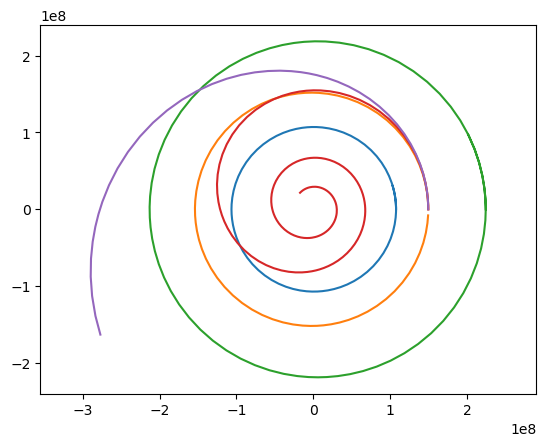

In [6]:
venus = solve_ivp(Fsun, [0, 2e7], [0.72*AU, 0, 0, 35], rtol=1e-8)
earth = solve_ivp(Fsun, [0, 3.2e7], [AU, 0, 0, 30], rtol=1e-8)
mars = solve_ivp(Fsun, [0, 6e7], [1.5*AU, 0, 0, 24], rtol=1e-8)


sail_in = solve_ivp(Fsail, [0, 3.2e7], [AU, 0, 0, 30], rtol=1e-8, args=[-0.6])
sail_out = solve_ivp(Fsail, [0, 3.2e7], [AU, 0, 0, 30], rtol=1e-8, args=[0.6])

plt.plot(venus.y[0], venus.y[1])
plt.plot(earth.y[0], earth.y[1])
plt.plot(mars.y[0], mars.y[1])
plt.axis('equal')
plt.plot(sail_in.y[0], sail_in.y[1])
plt.plot(sail_out.y[0], sail_out.y[1])

plt.show()

[[3.84400000e+08 0.00000000e+00 0.00000000e+00]
 [3.84399996e+08 0.00000000e+00 0.00000000e+00]
 [3.84399983e+08 5.52954066e-03 0.00000000e+00]
 ...
 [3.83534589e+08 5.94163043e+07 0.00000000e+00]
 [3.83530886e+08 5.94175817e+07 0.00000000e+00]
 [3.83527177e+08 5.94188640e+07 0.00000000e+00]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.37196140e+02 5.11500000e+05 0.00000000e+00]
 [1.34878426e+03 1.02299955e+06 0.00000000e+00]
 ...
 [7.02228038e+07 2.92707181e+08 0.00000000e+00]
 [7.05232725e+07 2.93115028e+08 0.00000000e+00]
 [7.08242648e+07 2.93522484e+08 0.00000000e+00]]


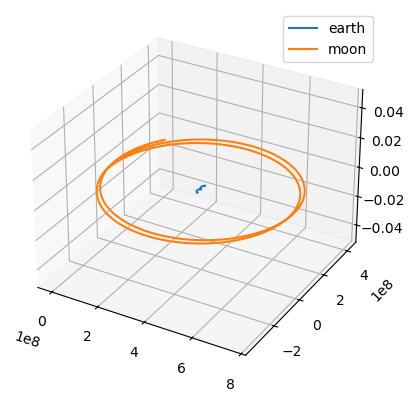

In [7]:
# 1. Identify the locations of the planets (image recognition)
# 2. Know where the planets should be relative to a certain point (eart, sun, etc.)
# 3. Use that information to determine spacecraft location

# 2 -> Developing a model of our solar system using python


# TODO generate ploting info
#print(utils.gravaccel(np.array([0,0,0]), np.array([6378100,0,0]), 100, 5.97219E+24))

b1 = body.Body("earth", np.array([384400000,0,0]), np.array([0,0,0]), np.array([0,0,0]), 5.97219E+24)
b2 = body.Body("moon", np.array([0,0,0]), np.array([0,1023,0]), np.array([0,0,0]), 7.36E+22)

#b1.displayState()
#b2.displayState()

utils.integrate(np.array([b1, b2]), 5000000, 10000)

#b1.displayState()
#b2.displayState()

print(b1.locations)
print(b2.locations)

utils.plotbodies(np.array([b1, b2]))